<a href="https://colab.research.google.com/github/atalaydenknalbant/Card-matching-game/blob/master/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


## Load cifar10 dataset into training and testing variables


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('train dataset shape', x_train.shape,y_train.shape)
print('test dataset shape', x_test.shape,y_test.shape)

train dataset shape (50000, 32, 32, 3) (50000, 1)
test dataset shape (10000, 32, 32, 3) (10000, 1)


## Normalize Data

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Create Sequantial Model

In [4]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.TPUStrategy(tpu)

with tpu_strategy.scope():
  model = keras.Sequential([
        keras.Input(shape=(32,32,3)) ,
        layers.Conv2D(32,[3,3],padding='same',activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),  
        layers.BatchNormalization() ,
        layers.Conv2D(32,[3,3],padding='same',activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),  
        layers.BatchNormalization() ,    
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(64,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization() , 
        layers.Conv2D(64,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization() ,         
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.3),
        layers.Conv2D(128,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),            
        layers.BatchNormalization()   ,  
        layers.Conv2D(128,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),            
        layers.BatchNormalization()   ,         
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(64,activation='relu',
                     kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization()   ,  
        layers.Dropout(0.5),
        layers.Dense(10,activation='softmax')
  ]
        )
  model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001,decay=1e-6),
    metrics=['accuracy']
)
  model.summary()

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.84.190.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.84.190.74:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Train Model

In [5]:
model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=2)

Epoch 1/100
782/782 - 16s - loss: 1.8834 - accuracy: 0.3669
Epoch 2/100
782/782 - 4s - loss: 1.4102 - accuracy: 0.5300
Epoch 3/100
782/782 - 4s - loss: 1.2263 - accuracy: 0.6046
Epoch 4/100
782/782 - 4s - loss: 1.1694 - accuracy: 0.6279
Epoch 5/100
782/782 - 4s - loss: 1.0733 - accuracy: 0.6680
Epoch 6/100
782/782 - 4s - loss: 1.0270 - accuracy: 0.6952
Epoch 7/100
782/782 - 4s - loss: 1.0100 - accuracy: 0.7046
Epoch 8/100
782/782 - 4s - loss: 0.9790 - accuracy: 0.7200
Epoch 9/100
782/782 - 4s - loss: 0.9492 - accuracy: 0.7334
Epoch 10/100
782/782 - 4s - loss: 0.9803 - accuracy: 0.7312
Epoch 11/100
782/782 - 4s - loss: 0.9817 - accuracy: 0.7366
Epoch 12/100
782/782 - 4s - loss: 0.9342 - accuracy: 0.7524
Epoch 13/100
782/782 - 4s - loss: 0.9005 - accuracy: 0.7670
Epoch 14/100
782/782 - 4s - loss: 0.9007 - accuracy: 0.7691
Epoch 15/100
782/782 - 4s - loss: 0.8893 - accuracy: 0.7743
Epoch 16/100
782/782 - 4s - loss: 0.8856 - accuracy: 0.7772
Epoch 17/100
782/782 - 4s - loss: 0.9330 - accur

## Evaluate Model

In [6]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 5s - loss: 0.7061 - accuracy: 0.8609


[0.7060695886611938, 0.8608999848365784]

## Predict Images

In [7]:
y_pred = model.predict(x_test)
y_pred[:10]

array([[7.03957106e-04, 3.05557915e-05, 1.37973425e-03, 9.75746751e-01,
        2.87097559e-04, 1.35092475e-02, 7.68693537e-03, 2.80350232e-05,
        6.05593843e-04, 2.20896909e-05],
       [9.50492686e-04, 5.27030963e-04, 2.60302659e-05, 9.74677823e-05,
        1.94367676e-05, 1.37951865e-05, 1.28481524e-05, 4.46436388e-06,
        9.98255432e-01, 9.30041278e-05],
       [3.50754289e-03, 1.40109076e-03, 8.96247395e-04, 1.30835353e-04,
        1.36957286e-04, 2.93412777e-05, 1.61205477e-04, 1.15460543e-05,
        9.93595958e-01, 1.29271299e-04],
       [9.41658318e-01, 2.92441313e-04, 2.81070848e-03, 3.68327717e-03,
        2.60935340e-04, 2.55356950e-04, 4.43899829e-04, 9.97922180e-05,
        4.97405156e-02, 7.54817098e-04],
       [3.06787173e-04, 1.78089860e-04, 5.66231599e-03, 1.80306227e-03,
        2.95073981e-03, 1.31393070e-04, 9.88809347e-01, 5.91544667e-05,
        7.21984834e-05, 2.69859993e-05],
       [6.36582117e-05, 1.07235401e-05, 2.00440627e-04, 1.87430787e-03,
   

In [8]:
y_test = y_test.reshape(-1,)
y_train =y_train.reshape(-1,)
print(y_test[:10])

[3 8 8 0 6 6 1 6 3 1]


In [9]:
y_pred_results = [np.argmax(x) for x in y_pred]
print(y_pred_results[:10])

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]


In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def show_image(x_train_sample, y_train_sample,index):
  plt.figure(figsize=(30,5))
  plt.imshow(x_train_sample[index])
  plt.xlabel(class_names[y_train_sample[index]])

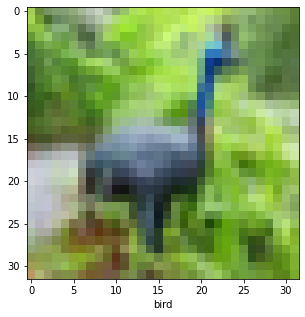

In [12]:
show_image(x_train,y_train,6)

313/313 - 2s


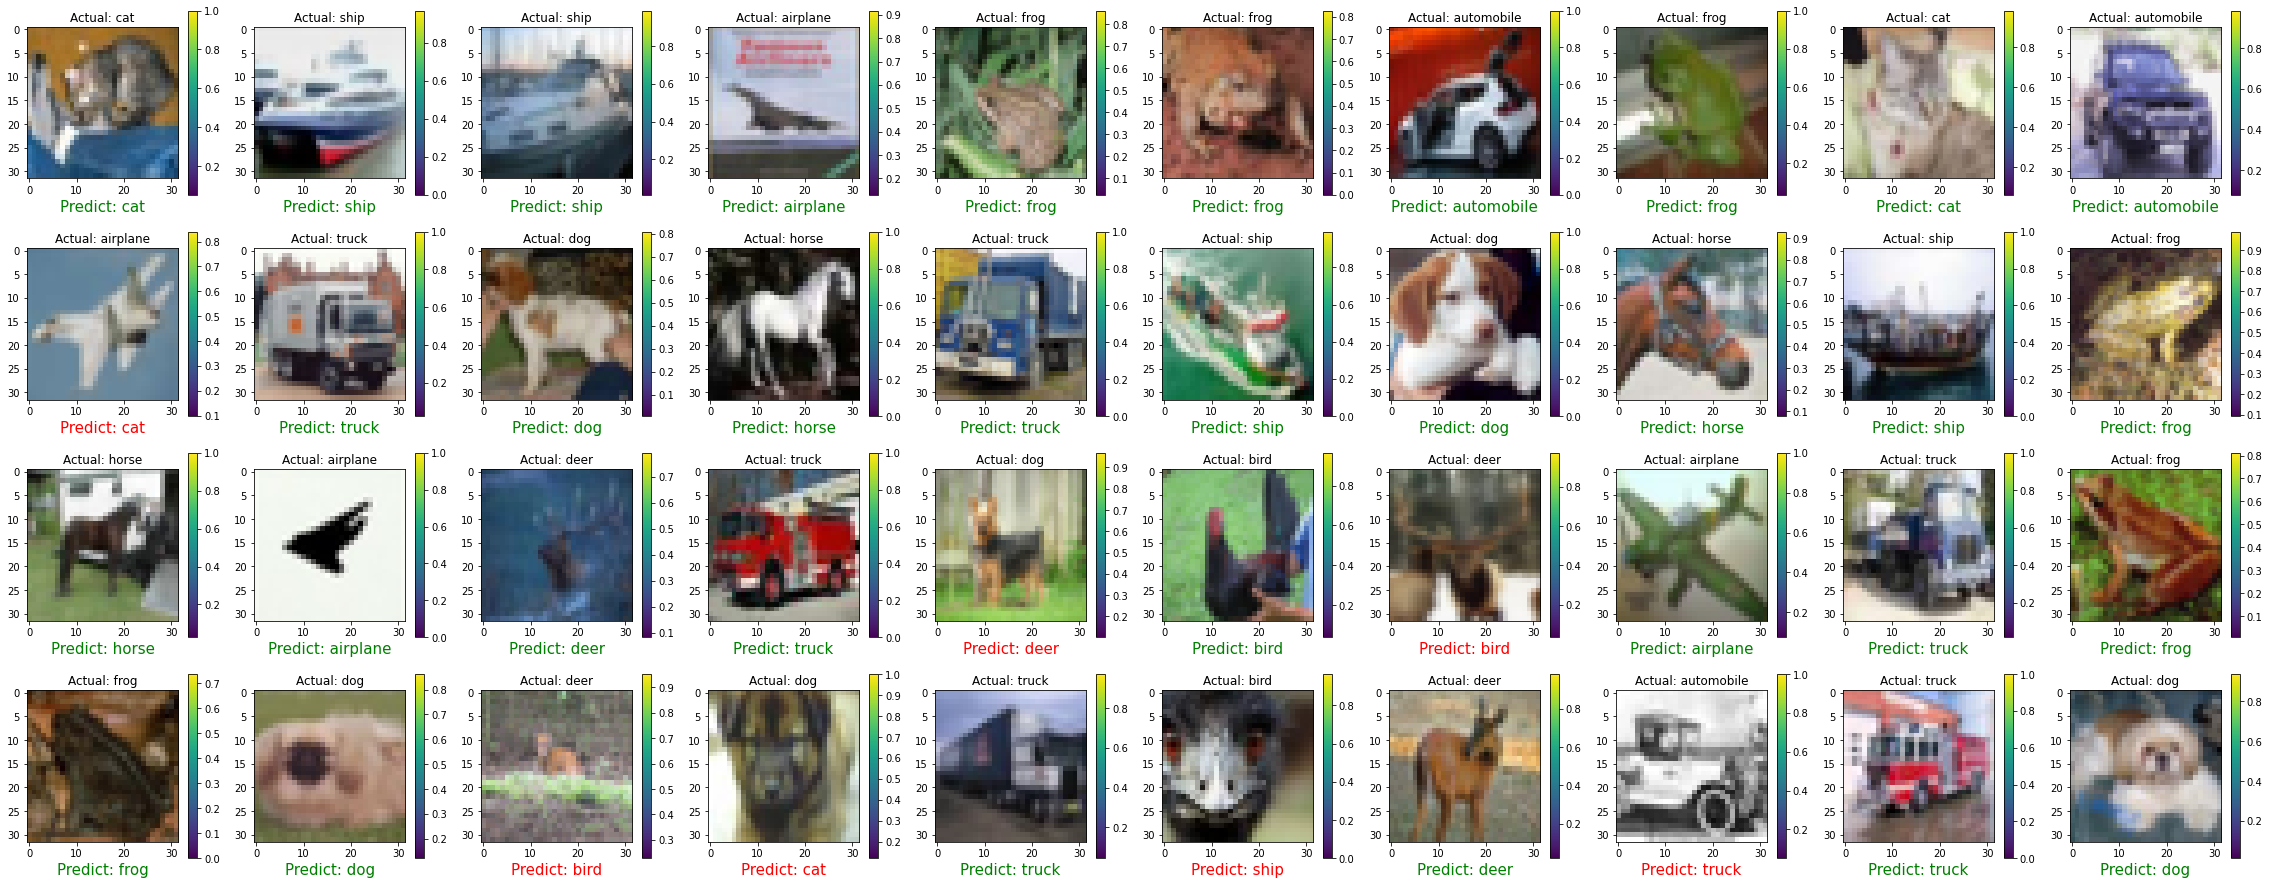

In [13]:
model.predict(x_test)
predictions = model.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[y_test[i]] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[y_test[i]]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break
